# Diploidal encoding (Kodowanie diploidalne)

The fenotype depends on the genotype in which there are two sets (komplety) of genes necessary to create a fenotype.

So we have two homologic chromosome, we can have genes (a, A) on the first spot, (b, B) on the second, etcetera.

Example: we have two chromosomes:
```
abcDE
AbcdE
```
What we still need is a rule that states which one of these (a or A, for example) expresses itself (think genetics and hair color in that known simple model). If we assume the capital letter is expressed (and, like in biology, call the lowercase (non-expressive) gene the **recessive** one and the expressive (in a pair) one would be the **dominating** gene.

In our example, we'd have
```
AbcDE
```
and this would create our fenotype.

To be even more concrete, say our pairs coresspond to
* (a, A) - (blond hair, dark hair)
* (b, B) - (blue, brown eyes)
* (c, C) - (short, tall)


Up until now we've been talking about halpoidal chromosomes ("haploidy") - there were no homologic chromosomes.

Diploidality allows a better adaptation to a varying (with time) environment. Example: there's a moth in England who changed wing color after the Industrial Revolution (to better fit to a polluted environment).

If suddenly a is preferred to A, we can either change the mechanism of expression (change your code, this happens in nature in some cases!) or say that when a meets a, the lowercase a fenotype (above: blond hair) expresses itself. Selection pressure will do the rest, as lowercase a's will be preferred in future populations.

For our purposes, we will have two types of genes:

* Functional genes ("Geny funkcyjne") {0, 1} as before
* or modifier genes {m, M}, which describe a domination mechanism.

Gene 0 dominates in a fenotype if at least one of homologic chromosomes includes M.

|  | 0M | 0m | 1M | 1m |
|--|----|----|----|----|
|0M| 0  | 0  | 0  | 0  |
|0m| 0  | 0  | 0  | 1  |
|1M| 0  | 0  | 1  | 1  |
|1m| 0  | 1  | 1  | 1  |

We have a pretty trivial chromosome: only one gene is functional and only one is a modifier.

the 1m0m and 0m1m case is the same: the domination mechanism is off.

# Triallelic encoding (kodowanie triallelilczne)

Our genes can now be {0, 1, 2}. However, 1 is recessive and 2 is dominating. The fenotype is binary: {0, 1}. Both genes 1 and 2 encode the fenotype 1, but gene 2 is a stronger version of gene 1.

|  | 0 | 1 | 2 |
|--|---|---|---|
|0 | 0 | 0 | 1 |
|1 | 0 | 1 | 1 |
|2 | 1 | 1 | 1 |

## How to use this in practice, while coding? How to implement this?

This is also in Goldberg's p167

### The Backpack Problem (zagadnienie plecakowe)

We want to fit a bunch of objects , each with value $w_i$, mass $a_i$ and volume $V_i$ (these can be other parameters), in a backpack (fixed volume). We want to find a set $I = \{i\} = ?$, so that $\sum_I w_i = max$ and $\sum_I a_i < $ some given limit of how much we can lift denoted by $A$ and $\sum_I V_i < $ backpack volume $B$.

Apparently this is typical.

In [ ]:
import numpy as np
N = 10
A = 10
B = 10
np.random.seed(0)
w = np.random.random(N)
a = np.random.random(N)
b = np.random.random(N)

def value_function(w):
    return w.sum()

def constraints(a, A, b, B):
    return a.sum() < A and b.sum() < B



Suppose the problem changes with time: $a_i$ could change (drink water out of bottle on a trip, remove)

Say $w_7(t)$ oscillates between two values in a square wave fashion (once per one hundred generations). Or maybe $A(t)$ depends on time?

* With haploidal encoding
* with diploidal encoding

#TODO: PHOTO 1 

Note that the average effectiveness of diploidal encoding is lower (80% to 90%), and that haploidal encoding after a long time would also reach optimal values after an adverse change of environment conditions - but that would require a WHOLE LOT OF MUTATIONS.

# Podstawowe twierdzenie algorytmów genetycznych dla dipoidów

(basic statement of genetic algorithms for the case of diploides)

```
H0: xx0x     f(H_0) = f_d     f_r < f_d
H1: xx1x     f(H_1) = f_r     1 is, thus, recessive
```

Diploidality allows us to leave a certain pool of recessives.

Define $p$ a probability of a recessive gene. We're looking for $p^{t+1}$. To first approximation,

$$p^{t+1} = \frac{(p^t)^2 f_r + p^t (1-p^t) f_d } {(p^t)^2 f_r + (1-p^t)^2 ) f_d}$$

We've left out mutation and went with the "dominacja prosta" (basic domination) scheme.

This is what we get once we incorporate selection

The denominator is the average population fitness. Two recessives meet with probability $ (p^t)^2$ and then we get a fitness of $f_r$. In all other cases we get $f_d$ fitness from the dominant fenotype.

In the nominator: the recessive gene can propagate further if two recessives meet ($(p^t)^2$). The second factor in the nominator is called the "masking effect" (efekt maskowania).
1. A recessive meets a dominative, $p^t (1-p^t)$
2. the dominative fenotype is expressed, f_d$
3. the hidden recessive is selected into the next generation even though it wasn't expressed.

$$p^{t+1} = p_t \frac{(p^t f_r + (1-p^t) f_d } {(p^t)^2 f_r + (1-p^t)^2 ) f_d} K$$

where

$$ K = 1 - p_c \frac{\delta(H)}{L-1} - o(H) p_...?$$

is the factor responsible for crossover and mutation.

In the limiting case of $p_t << 1$

$$p_{t+1} \sim K p^t $$

If $K \sim 1$, the recessives remain at a relatively constant level of representation in the population after a long time.

### For haploides
(1 chromosome)

$$p_{t+1} = \frac{p^t f_r K}
{p^t f_r + (1-p^t) f_d}$$

Once again assuming $p^t << 1$, the expression goes to 
$$p_{t+1} \to \frac{p^t f_r K}
{f_d}$$

Thus for $f_r/f_d << 1$, the expression is $<<1$ - recessives are lost much, much faster than for diploides.

$$r = f_d / f_r >> 1$$

(plot below has some bugs)

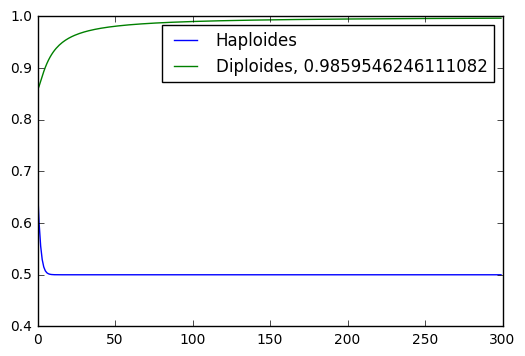

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
r = 2
p1 = 0.5
p2 = 0.5
p1_list = []
p2_list = []
NT = 300
for i in range(NT):
    p1r = 1/(r+p1*(1-r))
    p2r = 1*(p2 + (1-p2)*r)/(p2**2 + (1-p2**2)*r)
    p1 *= p1r
    p2 *= p2r
    p2_list.append(p2r)
    p1_list.append(p1r)
plt.plot(range(NT), p1_list, label="Haploides")
plt.plot(range(NT), p2_list, label="Diploides, {}".format(sum(p2_list)/NT))
plt.legend()
plt.show()

Długoterminowa pamięć dla haploidu! Recesywy w układzie nie giną!

For haploides: $$p^{t+1} = (1-\varepsilon) p^t + p_m (1-p^t) - p_m p^t $$

For a fixed point, set $p^{t+1} = p^t$:

$$\varepsilon p^t =  p_m (1- 2 p^t)$$
$$p^t (\varepsilon + 2 p_m) = p_m / (\varepsilon + 2 p_m) \sim p_m \ varepsilon$$